In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    """ Perceptron Classifier
    
    Parameters
    -----------
    learning_rate : float
        Learning rate for the update (>0)
    
    n_iterations: int 
        Max number of iteratons
    
    random_state: int
        Random number generator seed for weight initialization
    
    Attributes
    -----------
    W_: 1d array
        Weights of the classifier
    
    errors_: 1d array
        Number of misclassified points after each epoch
    """
    
    def __init__(self, lr, n_iterations=1000, random_state=None):
        self.learning_rate = lr
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.W_ = []
        self.errors_ = []
        
    def fit(self, X, Y):
        """ Trains the perceptron
        Parameters
        -----------
        X: (m, n) dimensional numpy array,
            where m is the number of training points
            and n is the number of features
        
        Y: 1d array of size m
            Prediction for each training example
        
        Returns
        --------
        None
        """
        np.random.seed(self.random_state)
        X = np.append(X, np.ones(X.shape[0]).reshape(X.shape[0],1), axis=1)
        if(len(self.W_) == 0):
            self.W_ = np.random.normal(loc=0, scale=1, size = X.shape[1])
        for i in range(self.n_iterations):
            error = 0
            for j in range(X.shape[0]):
                if(Y[j] * self.W_.dot(X[j]) < 0):
                    pred = 1 if self.W_.dot(X[j]) > 0 else -1
                    self.W_ += (Y[j]- pred )*(self.learning_rate * X[j])
                    error+=1
            self.errors_.append(error)
            if(error == 0):
                break
                
    def predict(self, X):
        """ Predict the ouput class
        
        Parameters
        -----------
        X: (m,n) dimensional array,
            where m is the number of samples to be predicted
            and n is the number of features
        Returns
        --------
        Y: 1d array of size m
        
        """
        if(X.shape[1] != len(self.W_)):
            X = np.append(X, np.ones(X.shape[0]).reshape(X.shape[0],1), axis=1)
        return np.where(X.dot(self.W_) > 0, 1, -1)
    

In [3]:
class Adaline:
    """ Adaptive Linear Classifier
    
    Parameters
    -----------
    learning_rate : float
        Learning rate for the update (>0)
    
    n_iterations: int 
        Max number of iteratons
    
    random_state: int
        Random number generator seed for weight initialization
    
    Attributes
    -----------
    W_: 1d array
        Weights of the classifier
    
    errors_: 1d array
        Number of misclassified points after each epoch
    """
    
    def __init__(self, lr, n_iterations=1000, random_state=None):
        self.learning_rate = lr
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.W_ = []
        self.errors_ = []
        
    def fit(self, X, Y):
        """ Trains the perceptron
        Parameters
        -----------
        X: (m, n) dimensional numpy array,
            where m is the number of training points
            and n is the number of features
        
        Y: 1d array of size m
            Prediction for each training example
        
        Returns
        --------
        None
        """
        np.random.seed(self.random_state)
        X = np.append(X, np.ones(X.shape[0]).reshape(X.shape[0],1), axis=1)

        if(len(self.W_) == 0):
            self.W_ = np.random.normal(loc=0, scale=1, size = X.shape[1])
        for i in range(self.n_iterations):
            self.W_ += self.learning_rate * (Y - self.W_.dot(X.T)).mean()
            error = 1/2*((Y - self.W_.dot(X.T))**2).mean()
            self.errors_.append(error)
                
    def predict(self, X):
        """ Predict the ouput class
        
        Parameters
        -----------
        X: (m,n) dimensional array,
            where m is the number of samples to be predicted
            and n is the number of features
        Returns
        --------
        Y: 1d array of size m
        
        """
        X = np.append(X, np.ones(X.shape[0]).reshape(X.shape[0],1), axis=1)
        return np.where(X.dot(self.W_) > 0, 1, -1)
    

In [4]:
from sklearn import datasets
df = datasets.load_iris()
features = pd.DataFrame(df.data)
target = pd.DataFrame(df.target)

In [5]:
X = features[target[0] == 0]
X = X.append(features[target[0] == 1])
X.reset_index(inplace=True, drop=True)

Y = np.vstack((target[target[0] == 0], target[target[0] == 1]))
## Label for setosa is 1 and for versicolor is -1
Y = np.where(Y == 0, -1, 1)
X = X.loc[:, [0,2]]
X.columns = range(len(X.columns))

In [12]:
clfPerceptron = Perceptron(.01, 100, 1)
clfAdaline = Adaline(.03, 10, 1)


In [13]:
clfPerceptron.fit(X, Y)
clfAdaline.fit(X, Y)

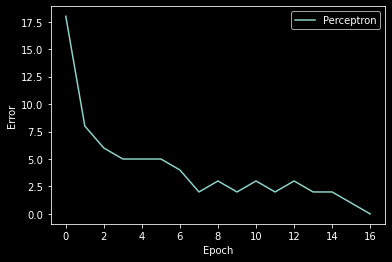

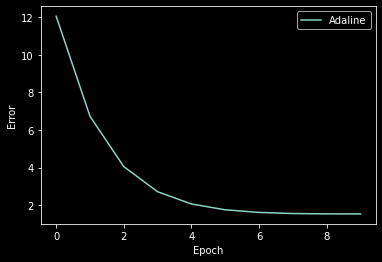

In [14]:
plt.plot(range(len(clfPerceptron.errors_)), clfPerceptron.errors_, label="Perceptron")
plt.style.use('dark_background')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.plot(range(len(clfAdaline.errors_)), clfAdaline.errors_, label="Adaline")
plt.style.use('dark_background')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

plt.show()

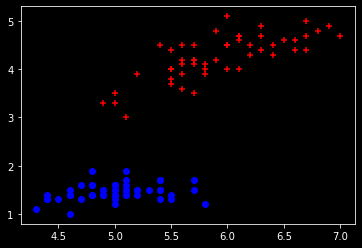

In [15]:
colors = ['blue', 'red']
markers = ['o' , '+']
for i in range(len(X)):
    color = colors[0] if Y[i]==-1 else colors[1]
    marker = markers[0] if Y[i]==-1 else markers[1]
    plt.scatter(X.loc[i,0], X.loc[i,1], c=color, marker=marker)
plt.show()


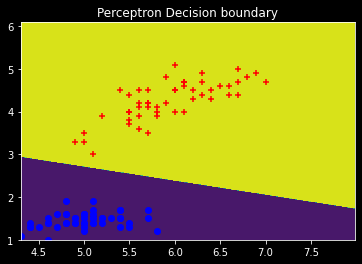

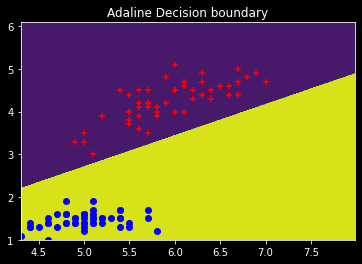

In [16]:
x1_min, x1_max = X.loc[:,0].min(), X.loc[:,0].max()+1
x2_min, x2_max = X.loc[:,1].min(), X.loc[:,1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01)) 

Z = clfPerceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
plt.contourf(xx1, xx2, Z.reshape(xx1.shape))

colors = ['blue', 'red']
markers = ['o' , '+']
for i in range(len(X)):
    color = colors[0] if Y[i]==-1 else colors[1]
    marker = markers[0] if Y[i]==-1 else markers[1]
    plt.scatter(X.loc[i,0], X.loc[i,1], c=color, marker=marker)
plt.title("Perceptron Decision boundary")
plt.show()

Z = clfAdaline.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
plt.contourf(xx1, xx2, Z.reshape(xx1.shape))

colors = ['blue', 'red']
markers = ['o' , '+']
for i in range(len(X)):
    color = colors[0] if Y[i]==-1 else colors[1]
    marker = markers[0] if Y[i]==-1 else markers[1]
    plt.scatter(X.loc[i,0], X.loc[i,1], c=color, marker=marker)
plt.title("Adaline Decision boundary")
plt.show()